In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [4]:
print(torch.__version__)

1.7.1


In [5]:
# Dummy Data 
X = torch.randn(20,10)
y = torch.randint(0,2, (20,1)).type(torch.FloatTensor)

X.to("cuda")
y.to("cuda")

input_units = 10
hidden_units = 5
output_units = 1

In [6]:

model = nn.Sequential(nn.Linear(input_units, hidden_units), \
    nn.ReLU(), \
    nn.Linear(hidden_units, output_units), \
    nn.Sigmoid())

loss_function = nn.MSELoss()

In [7]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)


In [8]:
loss_funct = nn.MSELoss()

losses= []
for i in range(100):
    # Call to the model to perform a prediction
    y_pred = model(X)
    loss = loss_funct(y_pred, y)
    losses.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if i % 5 == 0:
        print(i, loss.item())
    
    
    
    

0 0.26041820645332336
5 0.26019981503486633
10 0.25998401641845703
15 0.25977081060409546
20 0.25956010818481445
25 0.2593519985675812
30 0.2591462731361389
35 0.25894299149513245
40 0.258742094039917
45 0.25854355096817017
50 0.2583472430706024
55 0.2581532597541809
60 0.2579614222049713
65 0.2577717900276184
70 0.2575843036174774
75 0.25739893317222595
80 0.25721558928489685
85 0.2570343017578125
90 0.25685492157936096
95 0.2566775381565094


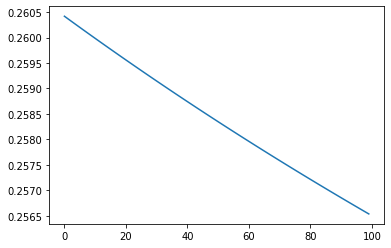

In [9]:
plt.plot(range(0,100), losses)
plt.show()
